# Results


After running several models Voting Classifier with top 5 models provides the best results for the dataset and the results are shown below:

Best Mean Cross Validation Score is 85.02%

Best Parameter is {'voting': 'soft'}

Train score is 88.88%

Test score is 85.55%

## Data Preprocessing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
# Load Dataset
data = pd.read_csv("C:/Users/tharu/OneDrive/Desktop/MS-Sem 2/Applied Machine Learning/Lectures/Module -4/titanic (2).csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# let's inspect the variable values

for var in data.columns:
    print(var, data[var].unique()[0:20], '\n')

PassengerId [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] 

Survived [0 1] 

Pclass [3 1 2] 

Name ['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)' 'Sandstrom, Miss. Marguerite Rut'
 'Bonnell, Miss. Elizabeth' 'Saundercock, Mr. William Henry'
 'Andersson, Mr. Anders Johan' 'Vestrom, Miss. Hulda Amanda Adolfina'
 'Hewlett, Mrs. (Mary D Kingcome) ' 'Rice, Master. Eugene'
 'Williams, Mr. Charles Eugene'
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)'
 'Masselmani, Mrs. Fatima'] 

Sex ['male' 'female'] 

Age [22. 38. 26. 35. nan 54.  2. 27. 14.  4. 58. 20. 39. 55. 31. 34. 15. 28.
  8. 19.] 

SibSp [1 0 3 4 2 5 8] 

Parch [0 1 2 5 3 4 6] 

Ticket ['A/5 21171' 'PC 1

In [6]:
# make list of variables  types

# numerical: discrete vs continuous
discrete = [var for var in data.columns if data[var].dtype!='O' and var!='Survived' and data[var].nunique()<10]
continuous = [var for var in data.columns if data[var].dtype!='O' and var!='Survived' and var not in discrete]

# mixed
mixed = ['Cabin']

# categorical
categorical = [var for var in data.columns if data[var].dtype=='O' and var not in mixed]

print(f'There are {len(discrete)} discrete variables')
print(f'There are {len(continuous)} continuous variables')
print(f'There are {len(categorical)} categorical variables')
print(f'There are {len(mixed)} mixed variables')

There are 3 discrete variables
There are 3 continuous variables
There are 4 categorical variables
There are 1 mixed variables


In [7]:
# missing values
data.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [8]:
# cardinality (number of different categories)

data[categorical+mixed].nunique()

Name        891
Sex           2
Ticket      681
Embarked      3
Cabin       147
dtype: int64

In [9]:
# Cabin- mixed variable
# \d regular expression for digts . \d+ one or more digits
data['Cabin_num'] = data['Cabin'].str.extract('(\d+)') # captures numerical part
data['Cabin_num'] = data['Cabin_num'].astype('float')
data['Cabin_cat'] = data['Cabin'].str[0] # captures the first letter

# show dataframe
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_num,Cabin_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,85.0,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,123.0,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,NaN


In [10]:
data['Title'] = data['Name'].str.split(',').str[1].str.split('\s+').str[1]
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_num,Cabin_cat,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,NaN,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,85.0,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,NaN,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,123.0,C,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,NaN,Mr.


In [11]:
data['Title'].value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Col.           2
Major.         2
Mlle.          2
Mme.           1
Lady.          1
Don.           1
Capt.          1
Sir.           1
Jonkheer.      1
Ms.            1
the            1
Name: Title, dtype: int64

In [12]:
data['Cabin_cat'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin_cat, dtype: int64

In [13]:
# drop original mixed
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_num,Cabin_cat,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,NaN,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,85.0,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,NaN,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,123.0,C,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,NaN,Mr.


In [14]:
data.drop(['PassengerId','Name','Ticket','Cabin'], axis=1,inplace=True)

In [15]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_num,Cabin_cat,Title
0,0,3,male,22.0,1,0,7.2500,S,NaN,NaN,Mr.
1,1,1,female,38.0,1,0,71.2833,C,85.0,C,Mrs.
2,1,3,female,26.0,0,0,7.9250,S,NaN,NaN,Miss.
3,1,1,female,35.0,1,0,53.1000,S,123.0,C,Mrs.
4,0,3,male,35.0,0,0,8.0500,S,NaN,NaN,Mr.


In [16]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin_num
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,200.00000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,50.49000
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,35.39497
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,2.00000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,22.00000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,43.00000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,77.25000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,148.00000


In [17]:
# separate into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('Survived', axis=1),  # predictors
    data['Survived'],  # target
    test_size=0.1,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((801, 10), (90, 10))

In [18]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_num,Cabin_cat,Title
815,1,male,NaN,0,0,0.0000,S,102.0,B,Mr.
877,3,male,19.0,0,0,7.8958,S,NaN,NaN,Mr.
193,2,male,3.0,1,1,26.0000,S,2.0,F,Master.
523,1,female,44.0,0,1,57.9792,C,18.0,B,Mrs.
634,3,female,9.0,3,2,27.9000,S,NaN,NaN,Miss.


In [19]:
y_train.dtypes

dtype('int64')

In [19]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 801 entries, 815 to 684
Data columns (total 10 columns):
Pclass       801 non-null int64
Sex          801 non-null object
Age          643 non-null float64
SibSp        801 non-null int64
Parch        801 non-null int64
Fare         801 non-null float64
Embarked     799 non-null object
Cabin_num    175 non-null float64
Cabin_cat    179 non-null object
Title        801 non-null object
dtypes: float64(3), int64(3), object(4)
memory usage: 68.8+ KB


In [22]:
pip install feature_engine

Note: you may need to restart the kernel to use updated packages.


In [20]:
# from feature-engine
from feature_engine import missing_data_imputers as mdi
# for one hot encoding with feature-engine
from feature_engine.categorical_encoders import OneHotCategoricalEncoder
from feature_engine.categorical_encoders import RareLabelCategoricalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [21]:
titanic_pipe = Pipeline([

    # missing data imputation 
    ('imputer_num_arbit',
     mdi.ArbitraryNumberImputer(arbitrary_number=-1,
                                variables=['Cabin_num'])),
    ('imputer_num_mean',
     mdi.MeanMedianImputer(imputation_method='mean',variables=['Age'])),
    
    ('imputer_cat_freq',
     mdi.FrequentCategoryImputer(variables=['Embarked'])),
    
    ('imputer_cat_missing',
     mdi.CategoricalVariableImputer(variables=['Cabin_cat','Title'])),

    # categorical encoding 
    ('encoder_rare_label',
     RareLabelCategoricalEncoder(tol=0.01,
                                    n_categories=4,
                                    variables=['Cabin_cat','Title'])),
    ('categorical_encoder',
     OneHotCategoricalEncoder( top_categories=None,
                               variables=['Sex', 'Embarked','Cabin_cat','Title'], # we can select which variables to encode
                               drop_last=True)),

])

In [22]:
titanic_pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('imputer_num_arbit',
                 ArbitraryNumberImputer(arbitrary_number=-1,
                                        variables=['Cabin_num'])),
                ('imputer_num_mean',
                 MeanMedianImputer(imputation_method='mean',
                                   variables=['Age'])),
                ('imputer_cat_freq',
                 FrequentCategoryImputer(variables=['Embarked'])),
                ('imputer_cat_missing',
                 CategoricalVariableImputer(variables=['Cabin_cat', 'Title'])),
                ('encoder_rare_label',
                 RareLabelCategoricalEncoder(n_categories=4, tol=0.01,
                                             variables=['Cabin_cat', 'Title'])),
                ('categorical_encoder',
                 OneHotCategoricalEncoder(drop_last=True, top_categories=None,
                                          variables=['Sex', 'Embarked',
                                                    

In [23]:
# Apply Transformations
X_train=titanic_pipe.transform(X_train)
X_test=titanic_pipe.transform(X_test)


In [26]:
hi=pd.DataFrame(X_train)
bi=pd.DataFrame(X_test)

In [25]:
hi.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin_num,Sex_male,Embarked_S,Embarked_C,Cabin_cat_B,Cabin_cat_Missing,Cabin_cat_F,Cabin_cat_D,Cabin_cat_Rare,Cabin_cat_E,Cabin_cat_C,Title_Mr.,Title_Master.,Title_Mrs.,Title_Miss.
815,1,29.858865,0,0,0.0000,102.0,1,1,0,1,0,0,0,0,0,0,1,0,0,0
877,3,19.000000,0,0,7.8958,-1.0,1,1,0,0,1,0,0,0,0,0,1,0,0,0
193,2,3.000000,1,1,26.0000,2.0,1,1,0,0,0,1,0,0,0,0,0,1,0,0
523,1,44.000000,0,1,57.9792,18.0,0,0,1,1,0,0,0,0,0,0,0,0,1,0
634,3,9.000000,3,2,27.9000,-1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,1


In [27]:
bi.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin_num,Sex_male,Embarked_S,Embarked_C,Cabin_cat_B,Cabin_cat_Missing,Cabin_cat_F,Cabin_cat_D,Cabin_cat_Rare,Cabin_cat_E,Cabin_cat_C,Title_Mr.,Title_Master.,Title_Mrs.,Title_Miss.
495,3,29.858865,0,0,14.4583,-1.0,1,0,1,0,1,0,0,0,0,0,1,0,0,0
648,3,29.858865,0,0,7.5500,-1.0,1,1,0,0,1,0,0,0,0,0,1,0,0,0
278,3,7.000000,4,1,29.1250,-1.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
31,1,29.858865,1,0,146.5208,78.0,0,0,1,1,0,0,0,0,0,0,0,0,1,0
255,3,29.000000,0,2,15.2458,-1.0,0,0,1,0,1,0,0,0,0,0,0,0,1,0


In [30]:
hibi=[hi,bi]
data1=pd.concat(hibi)

In [31]:
data1

,Pclass,Age,SibSp,Parch,Fare,Cabin_num,Sex_male,Embarked_S,Embarked_C,Cabin_cat_B,Cabin_cat_Missing,Cabin_cat_F,Cabin_cat_D,Cabin_cat_Rare,Cabin_cat_E,Cabin_cat_C,Title_Mr.,Title_Master.,Title_Mrs.,Title_Miss.
815,1,29.858865,0,0,0.0000,102.0,1,1,0,1,0,0,0,0,0,0,1,0,0,0
877,3,19.000000,0,0,7.8958,-1.0,1,1,0,0,1,0,0,0,0,0,1,0,0,0
193,2,3.000000,1,1,26.0000,2.0,1,1,0,0,0,1,0,0,0,0,0,1,0,0
523,1,44.000000,0,1,57.9792,18.0,0,0,1,1,0,0,0,0,0,0,0,0,1,0
634,3,9.000000,3,2,27.9000,-1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627,1,21.000000,0,0,77.9583,9.0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
380,1,42.000000,0,0,227.5250,-1.0,0,0,1,0,1,0,0,0,0,0,0,0,0,1
483,3,63.000000,0,0,9.5875,-1.0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
516,2,34.000000,0,0,10.5000,33.0,0,1,0,0,0,1,0,0,0,0,0,0,1,0


In [35]:
nd=data1.to_numpy

In [43]:
data1.to_csv('cmon', header=None, index=None, sep=',', mode='a')

In [44]:
nd

<bound method DataFrame.to_numpy of      Pclass        Age  SibSp  Parch      Fare  Cabin_num  Sex_male  \
815       1  29.858865      0      0    0.0000      102.0         1   
877       3  19.000000      0      0    7.8958       -1.0         1   
193       2   3.000000      1      1   26.0000        2.0         1   
523       1  44.000000      0      1   57.9792       18.0         0   
634       3   9.000000      3      2   27.9000       -1.0         0   
..      ...        ...    ...    ...       ...        ...       ...   
627       1  21.000000      0      0   77.9583        9.0         0   
380       1  42.000000      0      0  227.5250       -1.0         0   
483       3  63.000000      0      0    9.5875       -1.0         0   
516       2  34.000000      0      0   10.5000       33.0         0   
505       1  18.000000      1      0  108.9000       65.0         1   

     Embarked_S  Embarked_C  Cabin_cat_B  Cabin_cat_Missing  Cabin_cat_F  \
815           1           0        

In [41]:
data1.to_excel("letsdothis.xlsx") 

In [27]:
import warnings
warnings.filterwarnings('ignore')

# Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
c=np.logspace(-3,3,10)
param_grid={'C':c}

logreg=LogisticRegression()

grid_logit = GridSearchCV(logreg, param_grid, cv=5)

grid_logit.fit(X_train,y_train)
pred = grid_logit.predict(X_test)

print("Accuracy: {:.3f}".format(accuracy_score(y_test, pred)))

print("Logistic Regression Parameters: {}".format( grid_logit.best_params_)) 
print("Best Mean Cross Validation score is {}".format(grid_logit.best_score_))
print("Best estimator is {}".format(grid_logit.best_estimator_))
# Check test data set performance
print("Logistic Performance: ", grid_logit.score(X_test,y_test))


Accuracy: 0.867
Logistic Regression Parameters: {'C': 2.154434690031882}
Best Mean Cross Validation score is 0.8215062111801241
Best estimator is LogisticRegression(C=2.154434690031882, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Logistic Performance:  0.8666666666666667


# KNeighborsClassifier

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

# define a list of parameters

param_knn = {'n_neighbors': range(8,15)}

#apply grid search
grid_knn = GridSearchCV(knn, param_knn, cv=5, return_train_score=True)
grid_knn.fit(X_train, y_train)
pred = grid_knn.predict(X_test)

print("Accuracy: {:.3f}".format(accuracy_score(y_test, pred)))

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_knn.best_score_))
print()

#find best parameters
print('KNN parameters: ', grid_knn.best_params_)

# Check test data set performance
print("KNN Test Performance: ", grid_knn.score(X_test,y_test))

Accuracy: 0.822
Best Mean Cross-validation score: 0.72

KNN parameters:  {'n_neighbors': 14}
KNN Test Performance:  0.8222222222222222


# Decision Tree Classifier

In [30]:
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0)

#define a list of parameters
param_dtree = {'max_depth': range(1,20),'min_samples_split':range(2,10,1),'criterion':['gini','entropy'],'splitter':['random']}

#apply grid search
grid_dtree = GridSearchCV(dtree, param_dtree, cv=5, return_train_score = True)
grid_dtree.fit(X_train, y_train)
pred = grid_dtree.predict(X_test)

print("Accuracy: {:.3f}".format(accuracy_score(y_test, pred)))

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_dtree.best_score_))
print()

#find best parameters
print('Decision Tree parameters: ', grid_dtree.best_params_)

# Check test data set performance
print("Decision Tree Performance: ", grid_dtree.score(X_test,y_test))
print("Decision Train Performance: ", grid_dtree.score(X_train,y_train))

Accuracy: 0.833
Best Mean Cross-validation score: 0.84

Decision Tree parameters:  {'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 2, 'splitter': 'random'}
Decision Tree Performance:  0.8333333333333334
Decision Train Performance:  0.8439450686641697


# SVC using RBF Kernel

In [31]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svc=SVC(probability=True)
param_grid = [{'kernel': ['rbf'],
               'C': np.logspace(-3,3,5),
               'gamma': np.logspace(-3,3,5)}]
grid_svc_rbf = GridSearchCV(svc, param_grid, cv=3,
                          return_train_score=True)
grid_svc_rbf.fit(X_train, y_train)
pred = grid_svc_rbf.predict(X_test)

print("Accuracy: {:.3f}".format(accuracy_score(y_test, pred)))
print('train score: ', grid_svc_rbf.score(X_train, y_train))
print('test score: ', grid_svc_rbf.score(X_test, y_test))
print("Best parameters: {}".format(grid_svc_rbf.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_svc_rbf.best_score_))

Accuracy: 0.789
train score:  0.8551810237203495
test score:  0.7888888888888889
Best parameters: {'C': 31.622776601683793, 'gamma': 0.001, 'kernel': 'rbf'}
Best cross-validation score: 0.79


## SVC using Sigmoid Kernel

In [32]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svc=SVC(probability=True)
param_grid = [{'kernel': ['sigmoid'],
               'C': np.logspace(-3,3,5),
               'gamma': np.logspace(-3,3,5)}]
grid_svc_s = GridSearchCV(svc, param_grid, cv=3,
                          return_train_score=True)
grid_svc_s.fit(X_train, y_train)
pred = grid_svc_s.predict(X_test)

print("Accuracy: {:.3f}".format(accuracy_score(y_test, pred)))

print('train score: ', grid_svc_s.score(X_train, y_train))
print('test score: ', grid_svc_s.score(X_test, y_test))
print("Best parameters: {}".format(grid_svc_s.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_svc_s.best_score_))
              

Accuracy: 0.578
train score:  0.6317103620474407
test score:  0.5777777777777777
Best parameters: {'C': 0.03162277660168379, 'gamma': 0.001, 'kernel': 'sigmoid'}
Best cross-validation score: 0.63


## Linear SVC

In [33]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV


lsvc=SVC(kernel='linear',probability=True)
lsvc_param= {'C': [0.1]}
lsvc_grid = GridSearchCV(lsvc, lsvc_param,cv=5, return_train_score=True, )
lsvc_grid.fit(X_train,y_train)
pred = lsvc_grid.predict(X_test)

print("Accuracy: {:.3f}".format(accuracy_score(y_test, pred)))

print(f'Best Mean Cross Validation Score is {lsvc_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {lsvc_grid.best_params_}')
print(f'Train score is {lsvc_grid.score(X_train,y_train)}')
print(f'Test score is {lsvc_grid.score(X_test,y_test)}')



Accuracy: 0.833
Best Mean Cross Validation Score is 0.8190139751552795
Best Mean Cross Validation Score is {'C': 0.1}
Train score is 0.8252184769038702
Test score is 0.8333333333333334


## SVC using Poly Kernel

In [34]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svc=SVC(probability=True)
param_grid = [{'kernel': ['poly'],
               'degree':[1,2] }]
grid_svc_p = GridSearchCV(svc, param_grid, cv=3,
                          return_train_score=True)
grid_svc_p.fit(X_train, y_train)
pred = grid_svc_p.predict(X_test)

print("Accuracy: {:.3f}".format(accuracy_score(y_test, pred)))
print('train score: ', grid_svc_p.score(X_train, y_train))
print('test score: ', grid_svc_p.score(X_test, y_test))
print("Best parameters: {}".format(grid_svc_p.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_svc_p.best_score_))

Accuracy: 0.678
train score:  0.6754057428214731
test score:  0.6777777777777778
Best parameters: {'degree': 1, 'kernel': 'poly'}
Best cross-validation score: 0.67


In [74]:
grid_svc_p.cv_results_

{'mean_fit_time': array([0.06316392, 0.07812413]),
 'std_fit_time': array([0.00248786, 0.00490834]),
 'mean_score_time': array([0.00665005, 0.00598399]),
 'std_score_time': array([0.00094167, 0.0008143 ]),
 'param_degree': masked_array(data=[1, 2],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['poly', 'poly'],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'degree': 1, 'kernel': 'poly'}, {'degree': 2, 'kernel': 'poly'}],
 'split0_test_score': array([0.66666667, 0.65917603]),
 'split1_test_score': array([0.68164794, 0.65543071]),
 'split2_test_score': array([0.6741573 , 0.65168539]),
 'mean_test_score': array([0.6741573 , 0.65543071]),
 'std_test_score': array([0.00611608, 0.00305804]),
 'rank_test_score': array([1, 2]),
 'split0_train_score': array([0.66853933, 0.65917603]),
 'split1_train_score': array([0.67602996, 0.66479401]),
 'split2_train_score': array

# HW 3

In [ ]:
# Bagging with Decisison Tree

In [35]:
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
bag_dtree1 = BaggingClassifier(base_estimator=DecisionTreeClassifier(), bootstrap=True, random_state=0, oob_score=True)

bag_dtree1_param = {
                 'base_estimator__max_depth': range(1,10),
                 'base_estimator__criterion':['gini','entropy'],
                 'base_estimator__splitter':['random'],
                 'max_samples':  [0.8,1],
                 'n_estimators': [10,25,100]}
bag_dtree1_grid = GridSearchCV(bag_dtree1, bag_dtree1_param,cv=5, return_train_score=True, )
bag_dtree1_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                               class_weight=None,
                                                                               criterion='gini',
                                                                               max_depth=None,
                                                                               max_features=None,
                                                                               max_leaf_nodes=None,
                                                                               min_impurity_decrease=0.0,
                                                                               min_impurity_split=None,
                                                                               min_samples_leaf=1,
                                                                         

In [36]:
print(f'Best Mean Cross Validation Score is {bag_dtree1_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {bag_dtree1_grid.best_params_}')
print(f'Train score is {bag_dtree1_grid.score(X_train,y_train)}')
print(f'Test score is {bag_dtree1_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8351940993788819
Best Mean Cross Validation Score is {'base_estimator__criterion': 'gini', 'base_estimator__max_depth': 9, 'base_estimator__splitter': 'random', 'max_samples': 0.8, 'n_estimators': 25}
Train score is 0.9176029962546817
Test score is 0.8333333333333334


In [ ]:
# Pasting with Decision Tree

In [37]:
paste_dtree1 = BaggingClassifier(base_estimator=DecisionTreeClassifier(), bootstrap=False, random_state=0, oob_score=False)

paste_dtree1_param = {
                 'base_estimator__max_depth': range(1,10),
                 'base_estimator__criterion':['gini','entropy'],
                 'base_estimator__splitter':['random'],
                 'max_samples':  [0.8,1],
                 'n_estimators': [10,25,100]}
paste_dtree1_grid = GridSearchCV(paste_dtree1, paste_dtree1_param,cv=5, return_train_score=True, )
paste_dtree1_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                               class_weight=None,
                                                                               criterion='gini',
                                                                               max_depth=None,
                                                                               max_features=None,
                                                                               max_leaf_nodes=None,
                                                                               min_impurity_decrease=0.0,
                                                                               min_impurity_split=None,
                                                                               min_samples_leaf=1,
                                                                         

In [38]:
print(f'Best Mean Cross Validation Score is {paste_dtree1_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {paste_dtree1_grid.best_params_}')
print(f'Train score is {paste_dtree1_grid.score(X_train,y_train)}')
print(f'Test score is {paste_dtree1_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8364751552795031
Best Mean Cross Validation Score is {'base_estimator__criterion': 'entropy', 'base_estimator__max_depth': 6, 'base_estimator__splitter': 'random', 'max_samples': 0.8, 'n_estimators': 100}
Train score is 0.8739076154806492
Test score is 0.8222222222222222


In [ ]:
# Random Forest Classifier

In [39]:
from sklearn.ensemble import RandomForestClassifier
rfc =RandomForestClassifier(random_state=42)
rfc_param = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [6,7,8],
    'criterion' :['gini', 'entropy']
}

rfc_grid = GridSearchCV(rfc, rfc_param,cv=5, return_train_score=True, )
rfc_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [40]:
print(f'Best Mean Cross Validation Score is {rfc_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {rfc_grid.best_params_}')
print(f'Train score is {rfc_grid.score(X_train,y_train)}')
print(f'Test score is {rfc_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8402173913043478
Best Mean Cross Validation Score is {'criterion': 'entropy', 'max_depth': 7, 'max_features': 'auto', 'n_estimators': 200}
Train score is 0.8826466916354557
Test score is 0.8222222222222222


In [41]:
# Extra Tree Classifier

In [38]:
from  sklearn.ensemble import ExtraTreesClassifier
etc= ExtraTreesClassifier(random_state=42)
etc_param = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [6,7,8,9,10],
    'criterion' :['gini', 'entropy']
}
etc_grid = GridSearchCV(etc, etc_param,cv=5, return_train_score=True, )
etc_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                            class_weight=None, criterion='gini',
                                            max_depth=None, max_features='auto',
                                            max_leaf_nodes=None,
                                            max_samples=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100, n_jobs=None,
                                            oob_score=False, random_state=42,
                                            verbose=0, warm_start=False),
             iid='deprecated'

In [39]:
print(f'Best Mean Cross Validation Score is {etc_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {etc_grid.best_params_}')
print(f'Train score is {etc_grid.score(X_train,y_train)}')
print(f'Test score is {etc_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8314829192546584
Best Mean Cross Validation Score is {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 500}
Train score is 0.885143570536829
Test score is 0.8333333333333334


In [ ]:
#  AdaBoostClassifier 

In [44]:
from sklearn.ensemble import AdaBoostClassifier
adc_dtree =AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),random_state=42)
adc_dtree_param = {
              'base_estimator__criterion' : ["gini", "entropy"],
              'base_estimator__splitter' :   ["best", "random"],
              'base_estimator__max_depth' : [2,4,6],
              'n_estimators' : [100,150],
              'learning_rate' : [0.5,1.0,2],
             }
adc_dtree_grid = GridSearchCV(adc_dtree, adc_dtree_param,cv=5, return_train_score=True, )
adc_dtree_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                class_weight=None,
                                                                                criterion='gini',
                                                                                max_depth=None,
                                                                                max_features=None,
                                                                                max_leaf_nodes=None,
                                                                                min_impurity_decrease=0.0,
                                                                                min_impurity_split=None,
                                                                                min_samples_leaf=1,
 

In [45]:
print(f'Best Mean Cross Validation Score is {adc_dtree_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {adc_dtree_grid.best_params_}')
print(f'Train score is {adc_dtree_grid.score(X_train,y_train)}')
print(f'Test score is {adc_dtree_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8189906832298137
Best Mean Cross Validation Score is {'base_estimator__criterion': 'entropy', 'base_estimator__max_depth': 2, 'base_estimator__splitter': 'best', 'learning_rate': 0.5, 'n_estimators': 100}
Train score is 0.9425717852684145
Test score is 0.8222222222222222


In [46]:
# Gradient Boosting Classifier

In [47]:
from  sklearn.ensemble import GradientBoostingClassifier
gbc= GradientBoostingClassifier(random_state=42)
gbc_param = {
              'max_depth' : [2,3,4],
              'n_estimators' : [100,150],
              'learning_rate' : [0.5,1.0,2],
             }
gbc_grid = GridSearchCV(gbc, gbc_param,cv=5, return_train_score=True, )
gbc_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
         

In [48]:
print(f'Best Mean Cross Validation Score is {gbc_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {gbc_grid.best_params_}')
print(f'Train score is {gbc_grid.score(X_train,y_train)}')
print(f'Test score is {gbc_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8289829192546584
Best Mean Cross Validation Score is {'learning_rate': 0.5, 'max_depth': 2, 'n_estimators': 100}
Train score is 0.9300873907615481
Test score is 0.8222222222222222


In [ ]:
# XG BOOST

In [49]:
pip install xgboost

  Using cached https://files.pythonhosted.org/packages/b1/11/cba4be5a737c6431323b89b5ade818b3bbe1df6e8261c6c70221a767c5d9/xgboost-1.0.2-py3-none-win_amd64.whl
Note: you may need to restart the kernel to use updated packages.


In [41]:
from  xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
xgbc= XGBClassifier(random_state=42,early_stopping_rounds=2,objective= 'binary:logistic')
xgbc_param = {
              'max_depth' : [2,4,6,8],
              'n_estimators' : [50,60,100,150],
              'learning_rate' : [0.09,0.1,0.2,0.5,0.6,0.8],
               'min_child_weight' : [1,2,3,5,7],
                'subsample':[0.6,0.7,0.8,0.9,1]
             }
xgbc_grid = GridSearchCV(xgbc, xgbc_param,cv=5, return_train_score=True, )
xgbc_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=2, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_...
                                     subsample=None, tree_method=None,
                                     validate_parameters=False,
                                     verbosity=None),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.09, 0

In [42]:
print(f'Best Mean Cross Validation Score is {xgbc_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {xgbc_grid.best_params_}')
print(f'Train score is {xgbc_grid.score(X_train,y_train)}')
print(f'Test score is {xgbc_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8551708074534161
Best Mean Cross Validation Score is {'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 2, 'n_estimators': 100, 'subsample': 0.9}
Train score is 0.9250936329588015
Test score is 0.8111111111111111


In [37]:
# Summary

In [76]:
 classifiers={'knn':grid_knn,
              'logreg':grid_logit,
              'lsvc':lsvc_grid,
              'Ssvc':grid_svc_s,
              'Rsvc':grid_svc_rbf,
              'Psvc':grid_svc_p,
             'dtree':grid_dtree,
             'bag_dtree1':bag_dtree1_grid,
             'paste_dtree1': paste_dtree1_grid,
             'rfc': rfc_grid,
             'etc': etc_grid,
             'adc_dtree':adc_dtree_grid,
             'gbc': gbc_grid,
             'xgbc': xgbc_grid}

In [77]:
classifiers.keys()

dict_keys(['knn', 'logreg', 'lsvc', 'Ssvc', 'Rsvc', 'Psvc', 'dtree', 'bag_dtree1', 'paste_dtree1', 'rfc', 'etc', 'adc_dtree', 'gbc', 'xgbc'])

In [78]:
results_mean_std = []
for  key, value in classifiers.items():
    mean = value.cv_results_['mean_test_score'][value.best_index_]
    std=value.cv_results_['std_test_score'][value.best_index_]
     
    results_mean_std.append({
        "model": key,
        "mean": mean,
        "std": std
    })

In [79]:
# Create a Pandas DataFrame with the mean+std results
accuracy_df = pd.DataFrame(results_mean_std, columns=['model', 'mean', 'std'])

In [80]:
accuracy_df.sort_values(by=['mean'], inplace=True,ascending=False)
accuracy_df

,model,mean,std
13,xgbc,0.851429,0.022193
9,rfc,0.840217,0.017764
6,dtree,0.837748,0.028456
8,paste_dtree1,0.836475,0.018502
7,bag_dtree1,0.835194,0.024631
10,etc,0.831483,0.020331
12,gbc,0.828983,0.021697
1,logreg,0.821506,0.021182
2,lsvc,0.819014,0.026505
11,adc_dtree,0.818991,0.018804


In [81]:
# Create a prediction of all models on the test set
predictions_all = {}
for  key, value in classifiers.items():
    # Get best estimator
    best_model = value.best_estimator_
    
    # Predict test labels
    predictions = best_model.predict(X_test)
    
    # Save predictions to a list
    predictions_all[key] = predictions

In [82]:
pred = pd.DataFrame(predictions_all)

Text(0.5, 1, 'Correlation of the test set label prediction between models')

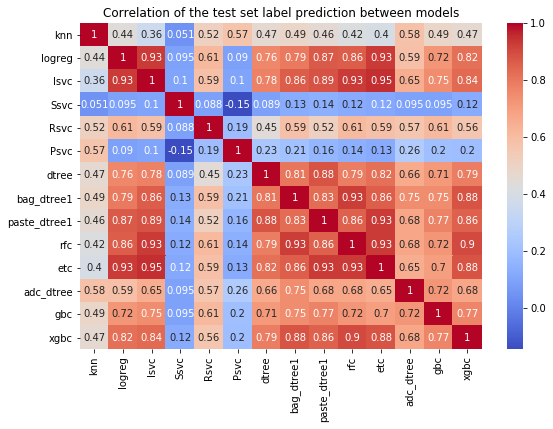

In [83]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,6))
g = sns.heatmap(pred.corr(), annot=True, cmap='coolwarm', ax=ax)
g.set_title('Correlation of the test set label prediction between models')

In [84]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=True)
    return au_corr[0:n]

In [85]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(pred, 5))

Top Absolute Correlations
knn     Ssvc         0.051414
Ssvc    Rsvc         0.087730
        dtree        0.089499
logreg  Psvc         0.090328
Ssvc    adc_dtree    0.094623
dtype: float64


In [43]:
from sklearn.ensemble import VotingClassifier

In [44]:
vclf1 = VotingClassifier(estimators=
                              [('dtree', grid_dtree.best_estimator_), 
                               ('xgbc', xgbc_grid.best_estimator_), 
                               ('rfc', rfc_grid.best_estimator_),
                               ('paste_dtree1', paste_dtree1_grid.best_estimator_),
                               ('bag_dtree1', bag_dtree1_grid.best_estimator_)
                              ], )
vclf1_param = {
              'voting' : ['hard','soft'],
             }
vclf1_grid = GridSearchCV(vclf1, vclf1_param,cv=5, return_train_score=True, )
vclf1_grid.fit(X_train,y_train)
pred = vclf1_grid.predict(X_test)

GridSearchCV(cv=5, error_score=nan,
             estimator=VotingClassifier(estimators=[('dtree',
                                                     DecisionTreeClassifier(ccp_alpha=0.0,
                                                                            class_weight=None,
                                                                            criterion='gini',
                                                                            max_depth=4,
                                                                            max_features=None,
                                                                            max_leaf_nodes=None,
                                                                            min_impurity_decrease=0.0,
                                                                            min_impurity_split=None,
                                                                            min_samples_leaf=1,
                                         

In [45]:
print(f'Best Mean Cross Validation Score is {vclf1_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {vclf1_grid.best_params_}')
print(f'Train score is {vclf1_grid.score(X_train,y_train)}')
print(f'Test score is {vclf1_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8502096273291926
Best Mean Cross Validation Score is {'voting': 'soft'}
Train score is 0.8888888888888888
Test score is 0.8555555555555555


In [92]:
vclf3 = VotingClassifier(estimators=
                              [('knn', grid_knn.best_estimator_), 
                               ('logreg', grid_logit.best_estimator_), 
                               ('Ssvc', grid_svc_s.best_estimator_),
                               ('adc_dtree', adc_dtree_grid.best_estimator_)
                              ], )
vclf3_param = {
              'voting' : ['hard','soft'],
             }
vclf3_grid = GridSearchCV(vclf3, vclf3_param,cv=5, return_train_score=True, )
vclf3_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=VotingClassifier(estimators=[('knn',
                                                     KNeighborsClassifier(algorithm='auto',
                                                                          leaf_size=30,
                                                                          metric='minkowski',
                                                                          metric_params=None,
                                                                          n_jobs=None,
                                                                          n_neighbors=14,
                                                                          p=2,
                                                                          weights='uniform')),
                                                    ('logreg',
                                                     LogisticRegression(C=2.154434690031882,
                             

In [93]:
print(f'Best Mean Cross Validation Score is {vclf3_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {vclf3_grid.best_params_}')
print(f'Train score is {vclf3_grid.score(X_train,y_train)}')
print(f'Test score is {vclf3_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.802748447204969
Best Mean Cross Validation Score is {'voting': 'soft'}
Train score is 0.8264669163545568
Test score is 0.8111111111111111


In [95]:
from sklearn.ensemble import StackingClassifier
sclf1 = StackingClassifier(estimators=
                               [('dtree', grid_dtree.best_estimator_), 
                               ('xgbc', xgbc_grid.best_estimator_), 
                               ('rfc', rfc_grid.best_estimator_),
                               ('paste_dtree1', paste_dtree1_grid.best_estimator_),
                               ('bag_dtree1', bag_dtree1_grid.best_estimator_)
                              ] , final_estimator=LogisticRegression())
sclf1_param = {
              'final_estimator__C' : [0.01,0.1,0.2],
              'stack_method':['auto', 'predict_proba']
             }
sclf1_grid = GridSearchCV(sclf1, sclf1_param,cv=5, return_train_score=True, )
sclf1_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=StackingClassifier(cv=None,
                                          estimators=[('dtree',
                                                       DecisionTreeClassifier(ccp_alpha=0.0,
                                                                              class_weight=None,
                                                                              criterion='gini',
                                                                              max_depth=4,
                                                                              max_features=None,
                                                                              max_leaf_nodes=None,
                                                                              min_impurity_decrease=0.0,
                                                                              min_impurity_split=None,
                                                                    

In [96]:
print(f'Best Mean Cross Validation Score is {sclf1_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {sclf1_grid.best_params_}')
print(f'Train score is {sclf1_grid.score(X_train,y_train)}')
print(f'Test score is {sclf1_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8402096273291925
Best Mean Cross Validation Score is {'final_estimator__C': 0.1, 'stack_method': 'auto'}
Train score is 0.8913857677902621
Test score is 0.8555555555555555


In [97]:
sclf2 = StackingClassifier(estimators=
                                [('knn', grid_knn.best_estimator_), 
                               ('logreg', grid_logit.best_estimator_), 
                               ('Ssvc', grid_svc_s.best_estimator_),
                               ('adc_dtree', adc_dtree_grid.best_estimator_)
                                                          ], 
                           final_estimator=
                           XGBClassifier(random_state=42,early_stopping_rounds=2,objective= 'binary:logistic'))
sclf2_param = {
              'final_estimator__max_depth' : [2,6],
              'final_estimator__n_estimators' : [50,150],
              'final_estimator__learning_rate' : [0.1,0.6,0.8],
              'final_estimator__min_child_weight' : [1,3,7],
              'final_estimator__subsample':[0.6,0.9,1],
              'stack_method':['auto', 'predict_proba']
             }
sclf2_grid = GridSearchCV(sclf2, sclf2_param,cv=5, return_train_score=True, )
sclf2_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=StackingClassifier(cv=None,
                                          estimators=[('knn',
                                                       KNeighborsClassifier(algorithm='auto',
                                                                            leaf_size=30,
                                                                            metric='minkowski',
                                                                            metric_params=None,
                                                                            n_jobs=None,
                                                                            n_neighbors=14,
                                                                            p=2,
                                                                            weights='uniform')),
                                                      ('logreg',
                                                   

In [98]:
print(f'Best Mean Cross Validation Score is {sclf2_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {sclf2_grid.best_params_}')
print(f'Train score is {sclf2_grid.score(X_train,y_train)}')
print(f'Test score is {sclf2_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8377406832298137
Best Mean Cross Validation Score is {'final_estimator__learning_rate': 0.1, 'final_estimator__max_depth': 2, 'final_estimator__min_child_weight': 3, 'final_estimator__n_estimators': 50, 'final_estimator__subsample': 0.6, 'stack_method': 'auto'}
Train score is 0.8813982521847691
Test score is 0.8
